# 1.データの取り込み、確認

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
display(train.head())
display(test.head())

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,463864,Male,Yes,81,No,Executive,NaN,High,2.0,Cat_6,B
1,465025,Male,Yes,73,Yes,Executive,0.0,High,2.0,Cat_6,C
2,461687,Female,Yes,77,Yes,Artist,0.0,High,2.0,Cat_6,B
3,461646,Female,Yes,60,Yes,Artist,NaN,High,4.0,Cat_6,C
4,459591,Male,Yes,50,Yes,Artist,1.0,Average,3.0,Cat_6,C


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,461642,Male,No,41,Yes,Artist,9.0,Low,2.0,Cat_6
1,462489,Male,Yes,46,Yes,Artist,0.0,Low,2.0,Cat_6
2,459573,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Cat_6
3,461424,Male,Yes,63,No,Healthcare,0.0,Average,4.0,Cat_4
4,460283,Male,Yes,43,Yes,Doctor,14.0,Low,2.0,Cat_6


# 2.データ探索(eda)

In [4]:
print("--------------------\ntrain---------------\n-------------------")
print(train.shape)
print(train.info())
print(train.isnull().sum())
print(train.describe())
print("--------------------\ntest---------------\n--------------------")
print(test.shape)
print(test.info())
print(test.isnull().sum())
print(test.describe())


--------------------
train---------------
-------------------
(6454, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6454 non-null   int64  
 1   Gender           6454 non-null   object 
 2   Ever_Married     6338 non-null   object 
 3   Age              6454 non-null   int64  
 4   Graduated        6396 non-null   object 
 5   Profession       6355 non-null   object 
 6   Work_Experience  5781 non-null   float64
 7   Spending_Score   6454 non-null   object 
 8   Family_Size      6190 non-null   float64
 9   Var_1            6392 non-null   object 
 10  Segmentation     6454 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 554.8+ KB
None
ID                   0
Gender               0
Ever_Married       116
Age                  0
Graduated           58
Profession          99
Work_Experience

In [5]:
#eda用にtrainデータをコピー
df_eda = train.copy()

<Axes: xlabel='Segmentation', ylabel='count'>

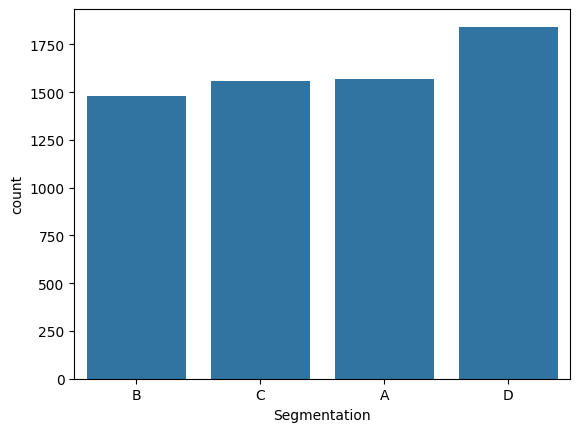

In [6]:
#Segmentaiton
sns.countplot(x="Segmentation",data=df_eda)

## 2.1-Gender

Gender  Segmentation
Female  A                723
        B                682
        C                713
        D                773
Male    A                848
        B                798
        C                847
        D               1070
Name: ID, dtype: int64

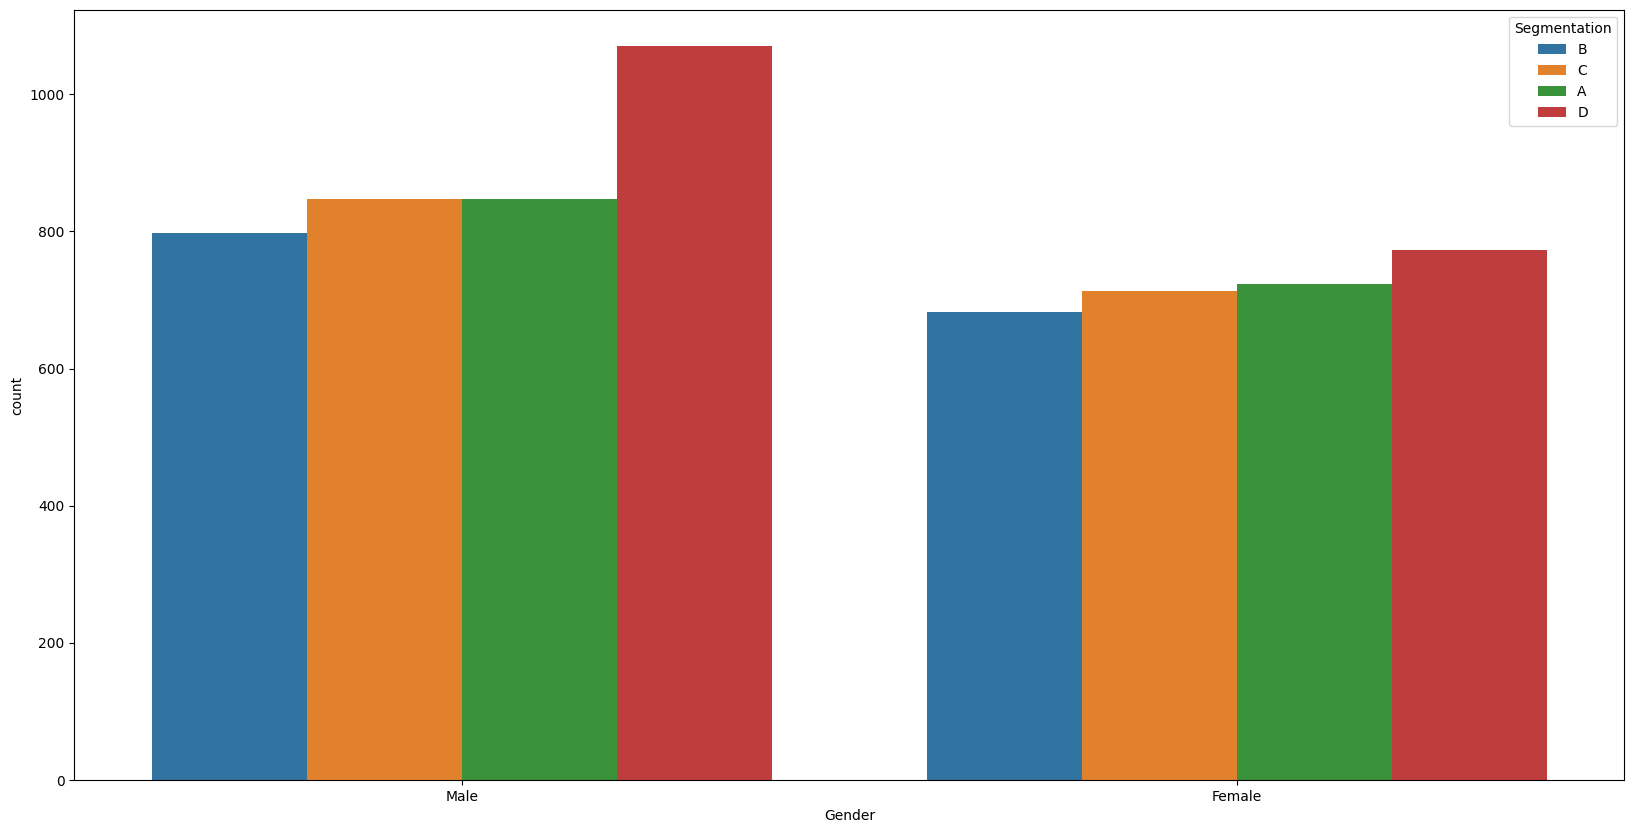

In [7]:
#Gender
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="Gender",hue="Segmentation",data=df_eda)
df_eda.groupby(["Gender","Segmentation"]).count()["ID"]

## 2.2-EverMarried

In [8]:
#Ever_Married(欠損確認)116行欠損
df_eda.query("Ever_Married != Ever_Married").head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
5,460504,Male,NaN,43,No,Executive,NaN,Average,3.0,Cat_3,A
31,460650,Female,NaN,20,No,Homemaker,13.0,Low,1.0,Cat_4,D
40,466522,Male,NaN,18,No,NaN,6.0,High,4.0,Cat_3,D
66,465983,Male,NaN,19,No,Healthcare,0.0,Low,3.0,Cat_6,D
207,465467,Male,NaN,33,No,Healthcare,1.0,Low,3.0,Cat_6,C
272,460669,Male,NaN,48,Yes,Executive,0.0,Low,2.0,Cat_1,B
356,466065,Male,NaN,19,No,Healthcare,9.0,Low,3.0,Cat_3,D
388,459699,Female,NaN,61,Yes,Engineer,9.0,Average,3.0,Cat_6,B
560,467110,Male,NaN,60,Yes,Lawyer,1.0,High,1.0,Cat_6,D
604,466137,Female,NaN,31,No,Healthcare,0.0,Low,4.0,Cat_6,C


Ever_Married  Segmentation
NULL          A                 29
              B                 27
              C                 21
              D                 39
No            A                640
              B                382
              C                315
              D               1311
Yes           A                902
              B               1071
              C               1224
              D                493
Name: ID, dtype: int64

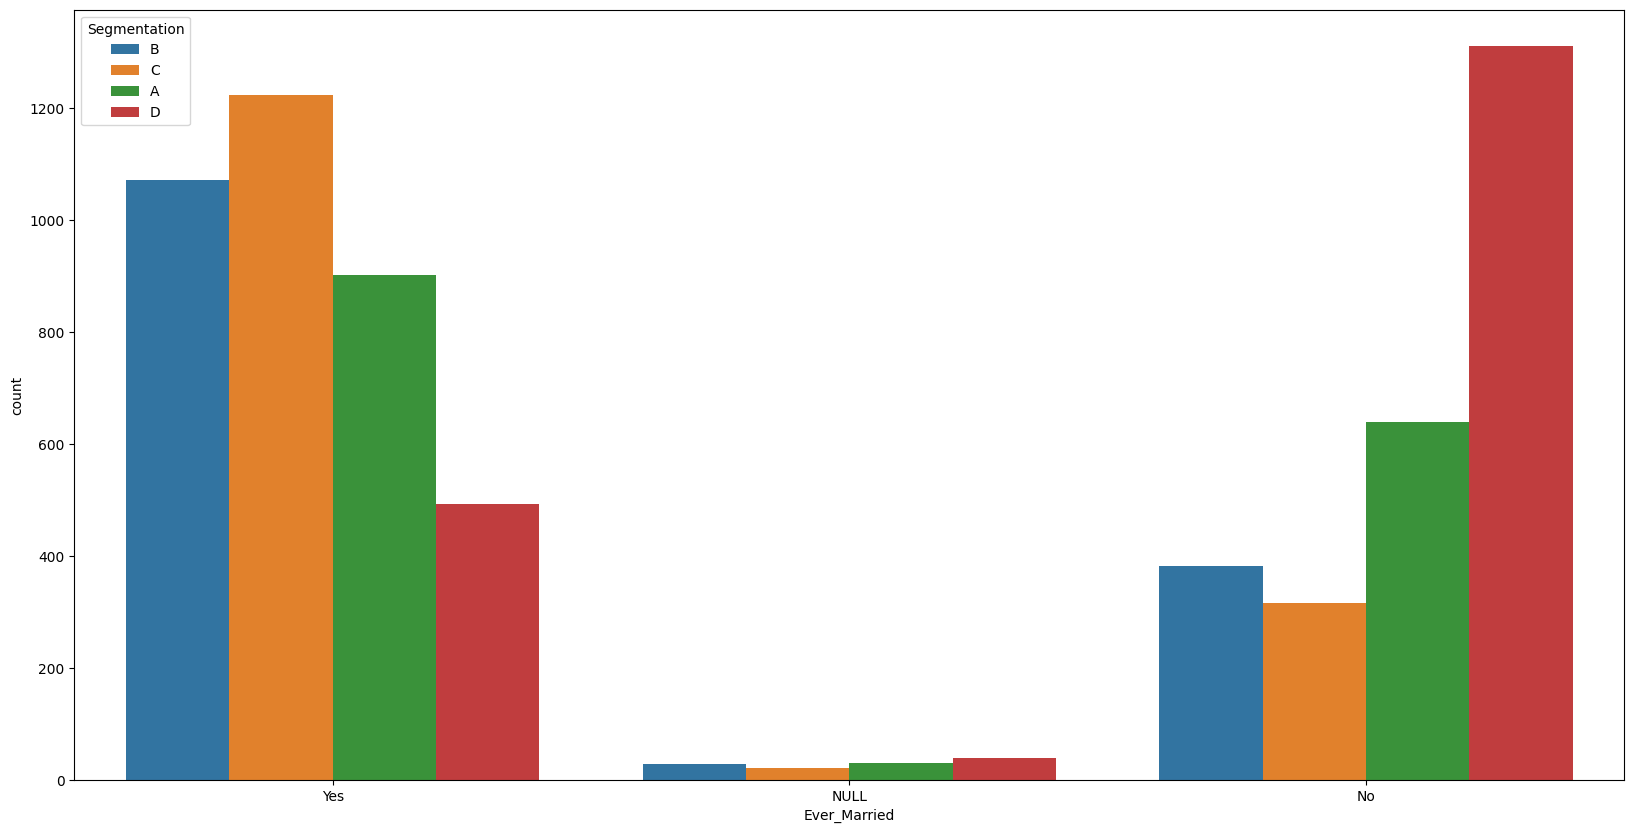

In [9]:
#Ever_Married
#欠損値の"NULL"という名称のカテゴリに変換してから集計
df_eda["Ever_Married"] = df_eda["Ever_Married"].fillna("NULL")

fig = plt.subplots(figsize=(20,10))
sns.countplot(x="Ever_Married",hue="Segmentation",data=df_eda)
df_eda.groupby(["Ever_Married","Segmentation"]).count()["ID"]

## 2.3-Age

Segmentation,A,B,C,D
count,1571.000000,1480.000000,1560.000000,1843.000000
mean,44.717377,47.979730,49.087821,33.207813
std,16.322048,14.758717,14.493567,15.716016
min,18.000000,18.000000,18.000000,18.000000
25%,32.500000,37.000000,38.000000,22.000000
50%,41.000000,46.000000,49.000000,29.000000
75%,52.000000,58.000000,58.000000,37.000000
max,89.000000,89.000000,89.000000,89.000000


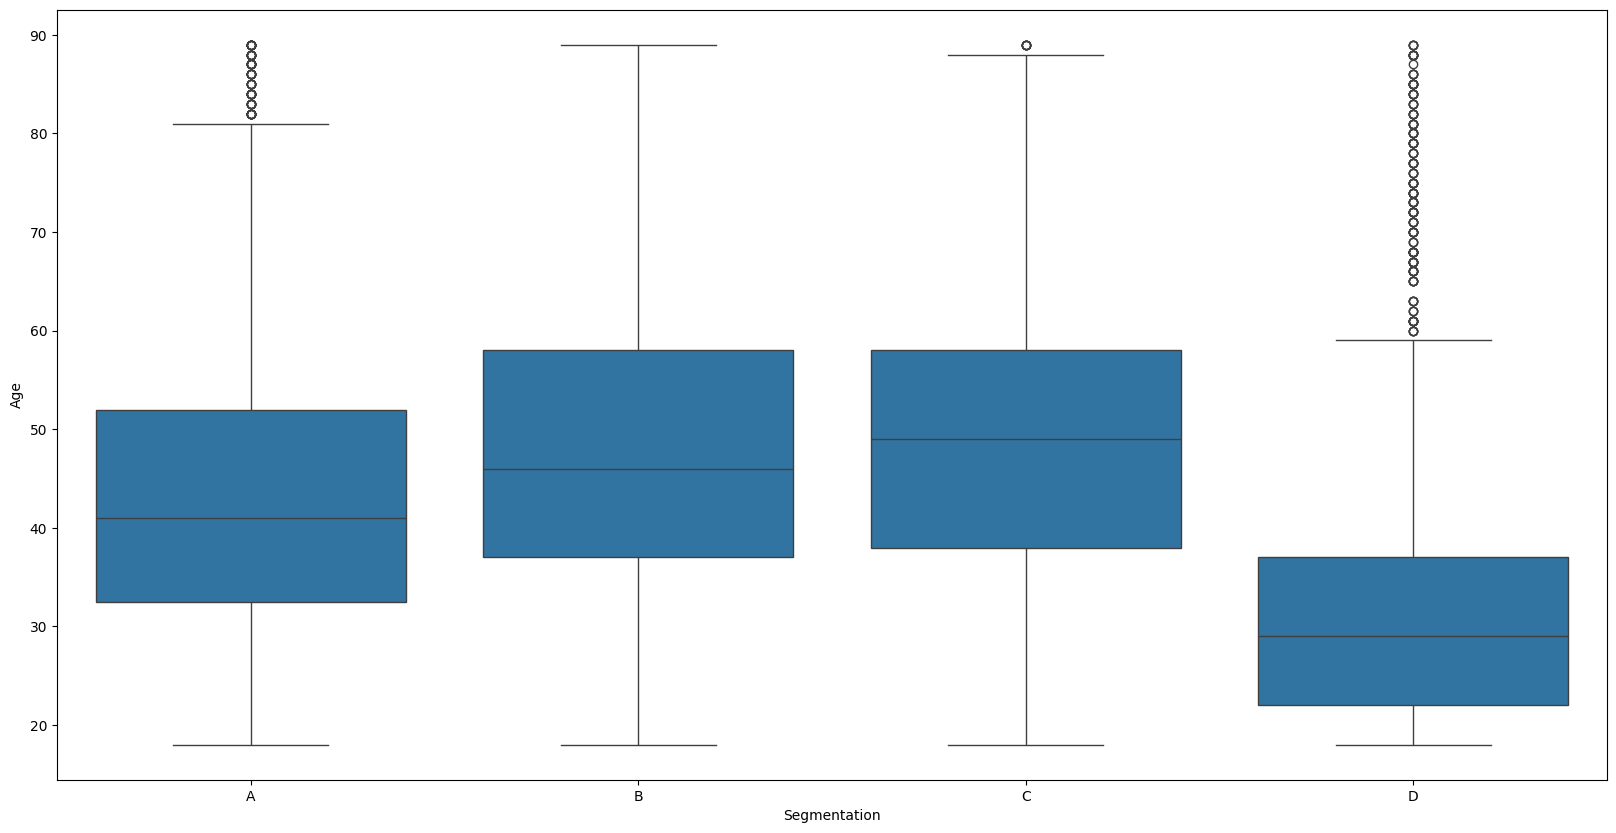

In [10]:
fig = plt.subplots(figsize=(20,10))
sns.boxplot(x="Segmentation",y="Age",data=df_eda,order=["A","B","C","D"])
df_eda.groupby("Segmentation").describe()["Age"].T

## 2.4-Graduate

In [11]:
#Graduate
df_eda.query("Graduated != Graduated").head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
270,463351,Female,No,22,NaN,Healthcare,3.0,Low,4.0,Cat_5,D
475,465257,Male,No,20,NaN,Healthcare,4.0,Low,5.0,Cat_2,D
702,466623,Male,Yes,56,NaN,Entertainment,4.0,Average,4.0,Cat_3,C
789,464973,Male,No,82,NaN,Lawyer,1.0,Low,2.0,Cat_4,A
1076,464392,Male,Yes,58,NaN,Artist,1.0,Average,2.0,Cat_6,B
1128,465058,Female,No,43,NaN,Entertainment,NaN,Low,1.0,Cat_6,B
1206,460679,Female,No,19,NaN,Healthcare,9.0,Low,4.0,Cat_3,D
1280,466654,Male,No,30,NaN,Marketing,8.0,Low,1.0,Cat_6,A
1354,463494,Male,Yes,47,NaN,Healthcare,NaN,Average,4.0,Cat_6,D
1549,466012,Male,Yes,56,NaN,Artist,2.0,Average,3.0,Cat_4,B


Graduated  Segmentation
NULL       A                 17
           B                 15
           C                 12
           D                 14
No         A                587
           B                408
           C                276
           D               1165
Yes        A                967
           B               1057
           C               1272
           D                664
Name: ID, dtype: int64

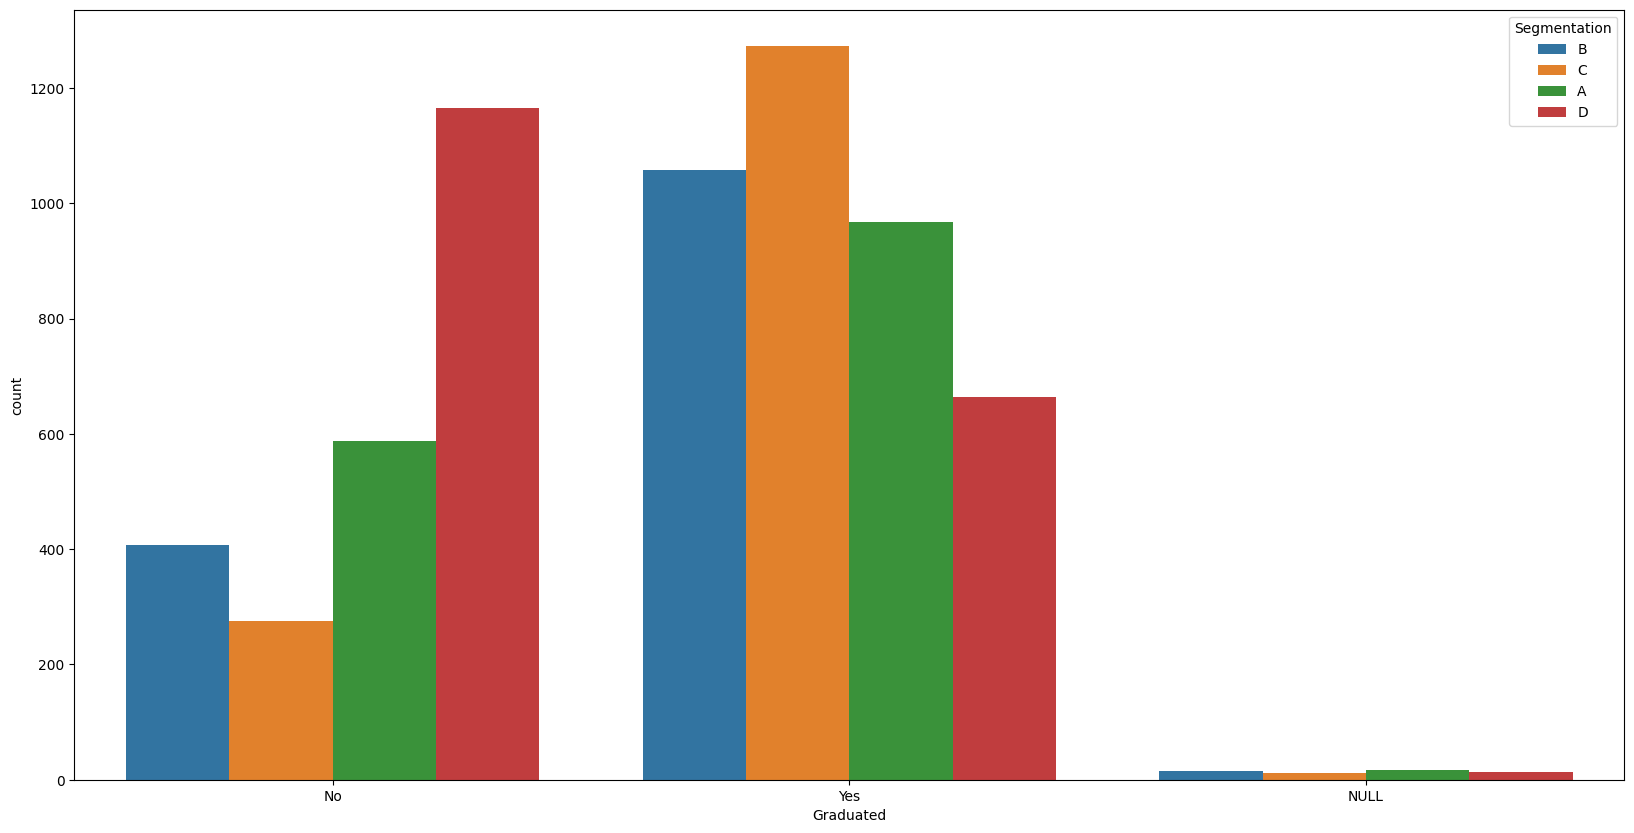

In [12]:
#Graduated
#欠損値を"NULL"という名称のカテゴリーに変換してから集計
df_eda["Graduated"] = df_eda["Graduated"].fillna("NULL")

fig = plt.subplots(figsize=(20,10))
sns.countplot(x="Graduated",hue="Segmentation",data=df_eda)
df_eda.groupby(["Graduated","Segmentation"]).count()["ID"]

## 2.5-Profession

In [13]:
#Profession 欠損確認(99行の欠損)
df_eda.query("Profession != Profession").head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
40,466522,Male,NULL,18,No,NaN,6.0,High,4.0,Cat_3,D
73,460353,Male,No,31,Yes,NaN,6.0,Low,1.0,Cat_4,D
102,464933,Male,No,25,No,NaN,0.0,Low,1.0,Cat_4,D
135,466167,Male,Yes,56,No,NaN,1.0,Low,2.0,Cat_4,B
167,462483,Male,Yes,63,Yes,NaN,1.0,Average,2.0,Cat_6,C
174,464707,Male,Yes,48,No,NaN,1.0,Average,4.0,Cat_4,A
287,466377,Male,Yes,62,Yes,NaN,8.0,Average,2.0,Cat_6,C
344,461226,Male,Yes,51,Yes,NaN,1.0,Low,2.0,Cat_6,D
375,467675,Female,No,39,No,NaN,NaN,Low,1.0,Cat_6,A
444,459656,Male,No,22,No,NaN,NaN,Low,6.0,Cat_1,D


Profession     Segmentation
Artist         A               432
               B               595
               C               845
               D               108
Doctor         A               155
               B               111
               C               111
               D               170
Engineer       A               203
               B               151
               C                61
               D               145
Entertainment  A               297
               B               184
               C               114
               D               173
Executive      A               103
               B               152
               C               149
               D                96
Healthcare     A                84
               B                85
               C               109
               D               804
Homemaker      A                61
               B                45
               C                17
               D           

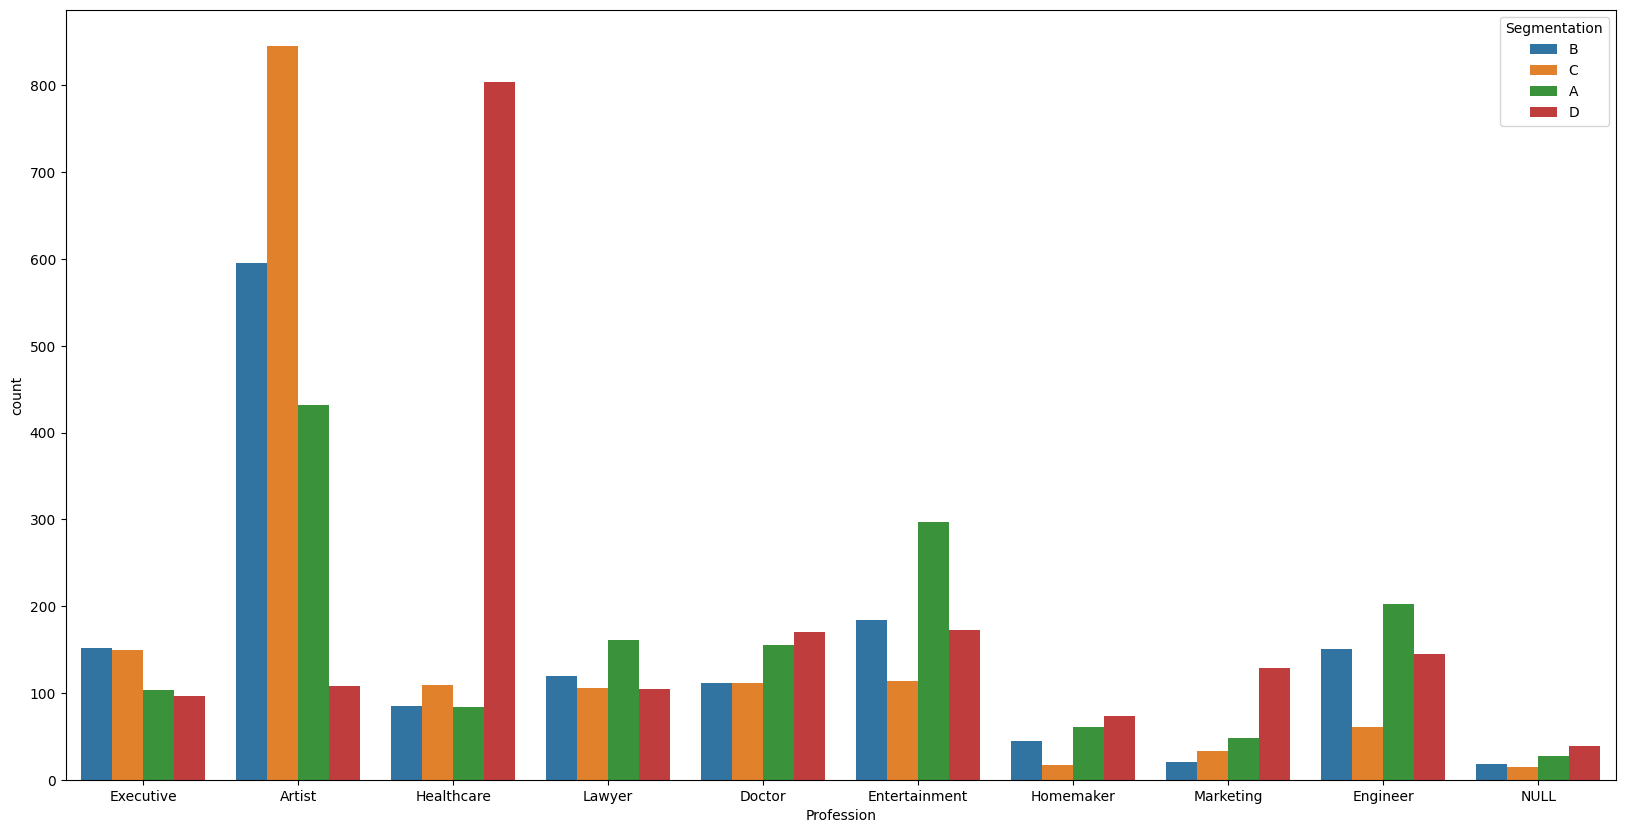

In [14]:
#Profession
#欠損値を"NULL"という名称のカテゴリーに変換してからカテゴリーに変換してから集計
df_eda["Profession"] = df_eda["Profession"].fillna("NULL")

fig = plt.subplots(figsize=(20,10))
sns.countplot(x="Profession",hue="Segmentation",data=df_eda)
df_eda.groupby(["Profession","Segmentation"]).count()["ID"]

## 2.7-Work_Experience

In [15]:
#Work_Experience欠損確認(673行欠損)
df_eda.query("Work_Experience != Work_Experience").head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,463864,Male,Yes,81,No,Executive,NaN,High,2.0,Cat_6,B
3,461646,Female,Yes,60,Yes,Artist,NaN,High,4.0,Cat_6,C
5,460504,Male,NULL,43,No,Executive,NaN,Average,3.0,Cat_3,A
13,462623,Male,No,35,No,Healthcare,NaN,Low,1.0,Cat_4,D
27,467514,Male,No,43,Yes,Artist,NaN,Low,4.0,Cat_6,D
29,461464,Male,No,59,Yes,Entertainment,NaN,Low,3.0,Cat_6,B
33,467206,Female,No,52,Yes,Artist,NaN,Low,1.0,Cat_6,C
42,464763,Female,Yes,49,No,Engineer,NaN,Average,4.0,Cat_4,B
44,461201,Female,No,59,Yes,Artist,NaN,Low,1.0,Cat_6,C
46,459602,Female,Yes,86,No,Lawyer,NaN,Low,1.0,Cat_6,D


Segmentation
D    235
B    158
A    154
C    126
Name: count, dtype: int64

Segmentation,A,B,C,D
count,1417.000000,1322.000000,1434.000000,1608.00000
mean,2.812985,2.358548,2.165272,3.01306
std,3.561153,3.192066,2.943505,3.59879
min,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.00000
50%,1.000000,1.000000,1.000000,1.00000
75%,5.000000,3.000000,3.000000,6.00000
max,14.000000,14.000000,14.000000,14.00000


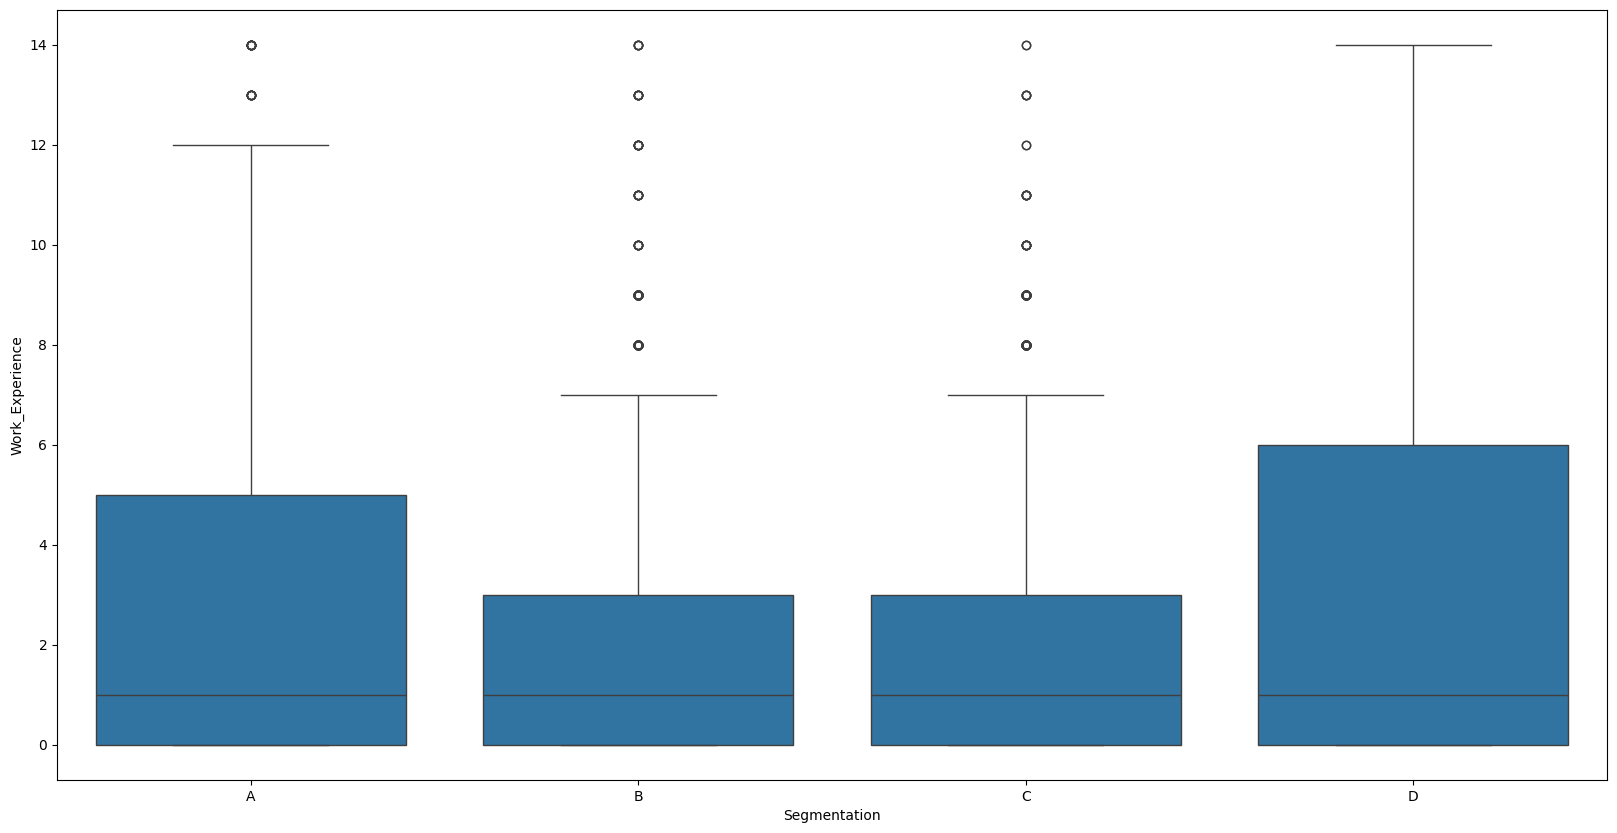

In [16]:
#Work_Experience
#欠損値のセグメント比率
adohoc = df_eda.query("Work_Experience != Work_Experience")
display(adohoc["Segmentation"].value_counts())

fig = plt.subplots(figsize=(20,10))
sns.boxplot(x="Segmentation",y="Work_Experience",data=df_eda,order=["A","B","C","D"])
df_eda.groupby("Segmentation").describe()["Work_Experience"].T

#欠損値はDの比率がやや高め、特徴量として使用できる
#DABCの順に職務経歴書が長い
#欠損値は中央値で埋めつつ、Work_ExperienceがNULLか否かの列を新しく作るのが良さそう

## 2.7-Spending_score

Spending_Score  Segmentation
Average         A                280
                B                488
                C                716
                D                103
High            A                222
                B                307
                C                325
                D                127
Low             A               1069
                B                685
                C                519
                D               1613
Name: ID, dtype: int64

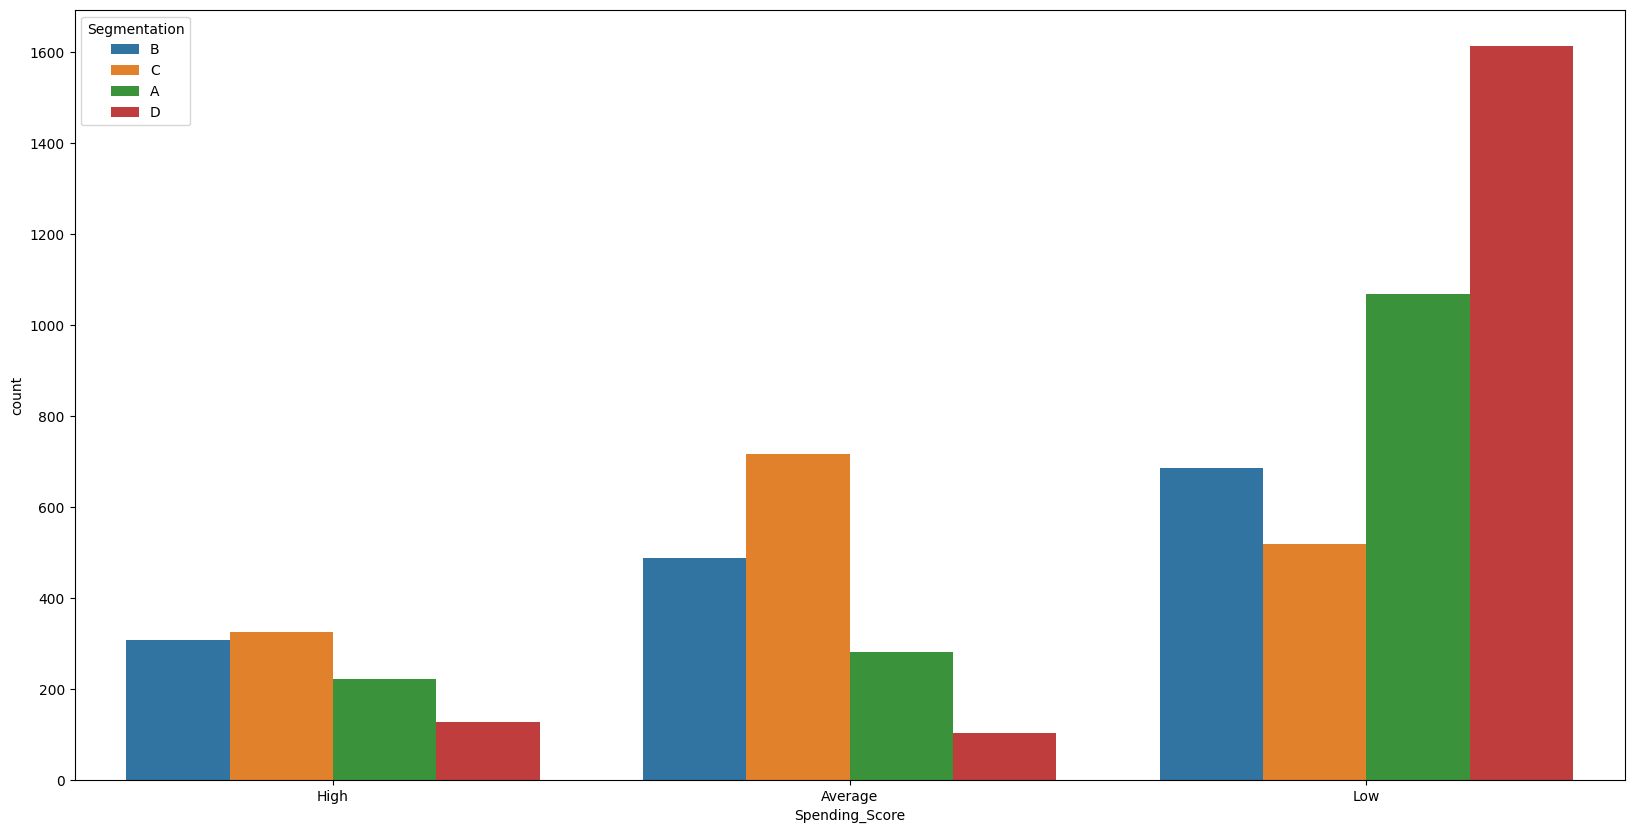

In [17]:
#Spending_Score
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="Spending_Score",hue="Segmentation",data=df_eda)
df_eda.groupby(["Spending_Score","Segmentation"]).count()["ID"]

## 2.8-Family_Size

In [18]:
#Family_Size欠損確認(264行欠損)
df_eda.query("Family_Size != Family_Size").head(30)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
23,459941,Male,Yes,65,Yes,Artist,4.0,Low,NaN,Cat_6,B
56,466173,Male,No,28,No,Entertainment,1.0,Low,NaN,Cat_3,A
67,459129,Female,No,26,Yes,Marketing,9.0,Low,NaN,Cat_3,D
81,460457,Female,No,43,Yes,Entertainment,8.0,Low,NaN,Cat_3,A
86,467568,Male,No,42,Yes,Artist,8.0,Low,NaN,Cat_6,A
107,462778,Male,Yes,60,Yes,Entertainment,0.0,Low,NaN,Cat_6,D
142,460619,Male,No,52,Yes,Entertainment,NaN,Low,NaN,Cat_3,C
175,459487,Male,Yes,67,No,Lawyer,NaN,Low,NaN,Cat_6,D
176,460651,Male,No,32,No,Homemaker,8.0,Low,NaN,Cat_4,A
243,466557,Female,No,21,No,Healthcare,7.0,Low,NaN,Cat_6,D


Segmentation
D    120
A     73
C     36
B     35
Name: count, dtype: int64

Segmentation,A,B,C,D
count,1498.000000,1445.000000,1524.000000,1723.000000
mean,2.440587,2.723183,2.998688,3.224028
std,1.484098,1.418925,1.373704,1.679197
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000
50%,2.000000,2.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,4.000000
max,9.000000,9.000000,9.000000,9.000000


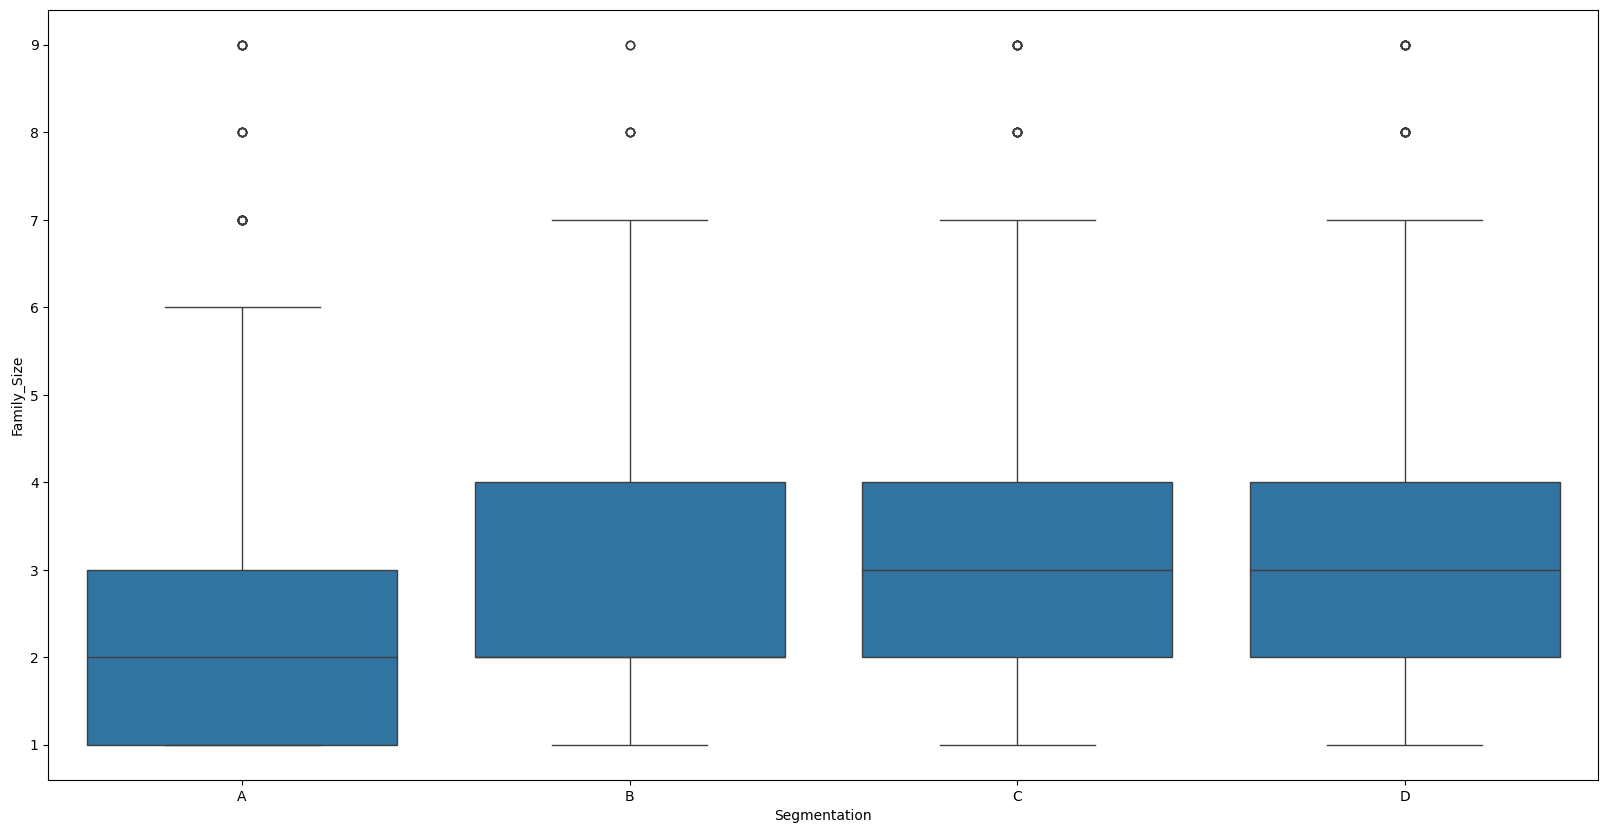

In [19]:
# Family_Size
#欠損値のセグメントを計算
adohoc = df_eda.query("Family_Size != Family_Size")
display(adohoc["Segmentation"].value_counts())

fig = plt.subplots(figsize=(20,10))
sns.boxplot(x="Segmentation",y="Family_Size",data=df_eda,order=["A","B","C","D"])
df_eda.groupby("Segmentation").describe()["Family_Size"].T

# 2.9-Var1

In [20]:
#Var_1(欠損値62行)
df_eda.query("Var_1 != Var_1").head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
68,462686,Male,Yes,41,Yes,Entertainment,9.0,Average,4.0,NaN,A
118,467544,Male,Yes,56,No,Artist,0.0,Low,2.0,NaN,C
296,463760,Female,No,27,No,Doctor,1.0,Low,NaN,NaN,A
471,459764,Male,Yes,48,Yes,Artist,1.0,Average,2.0,NaN,B
484,460893,Male,No,57,Yes,Entertainment,4.0,Low,1.0,NaN,A
596,463783,Female,No,30,No,Healthcare,NaN,Low,NaN,NaN,C
808,463270,Male,Yes,52,No,Executive,1.0,Low,5.0,NaN,A
862,466628,Male,No,32,No,Healthcare,8.0,Low,4.0,NaN,C
1030,460986,Male,No,37,Yes,Doctor,0.0,Low,3.0,NaN,A
1135,460852,Male,Yes,74,No,Executive,0.0,Low,NaN,NaN,D


Var_1  Segmentation
Cat_1  A                 26
       B                 23
       C                 22
       D                 42
Cat_2  A                 64
       B                 81
       C                 82
       D                104
Cat_3  A                165
       B                155
       C                124
       D                197
Cat_4  A                256
       B                187
       C                 85
       D                338
Cat_5  A                 15
       B                 15
       C                 17
       D                 23
Cat_6  A                989
       B                976
       C               1176
       D               1070
Cat_7  A                 39
       B                 31
       C                 37
       D                 53
NULL   A                 17
       B                 12
       C                 17
       D                 16
Name: ID, dtype: int64

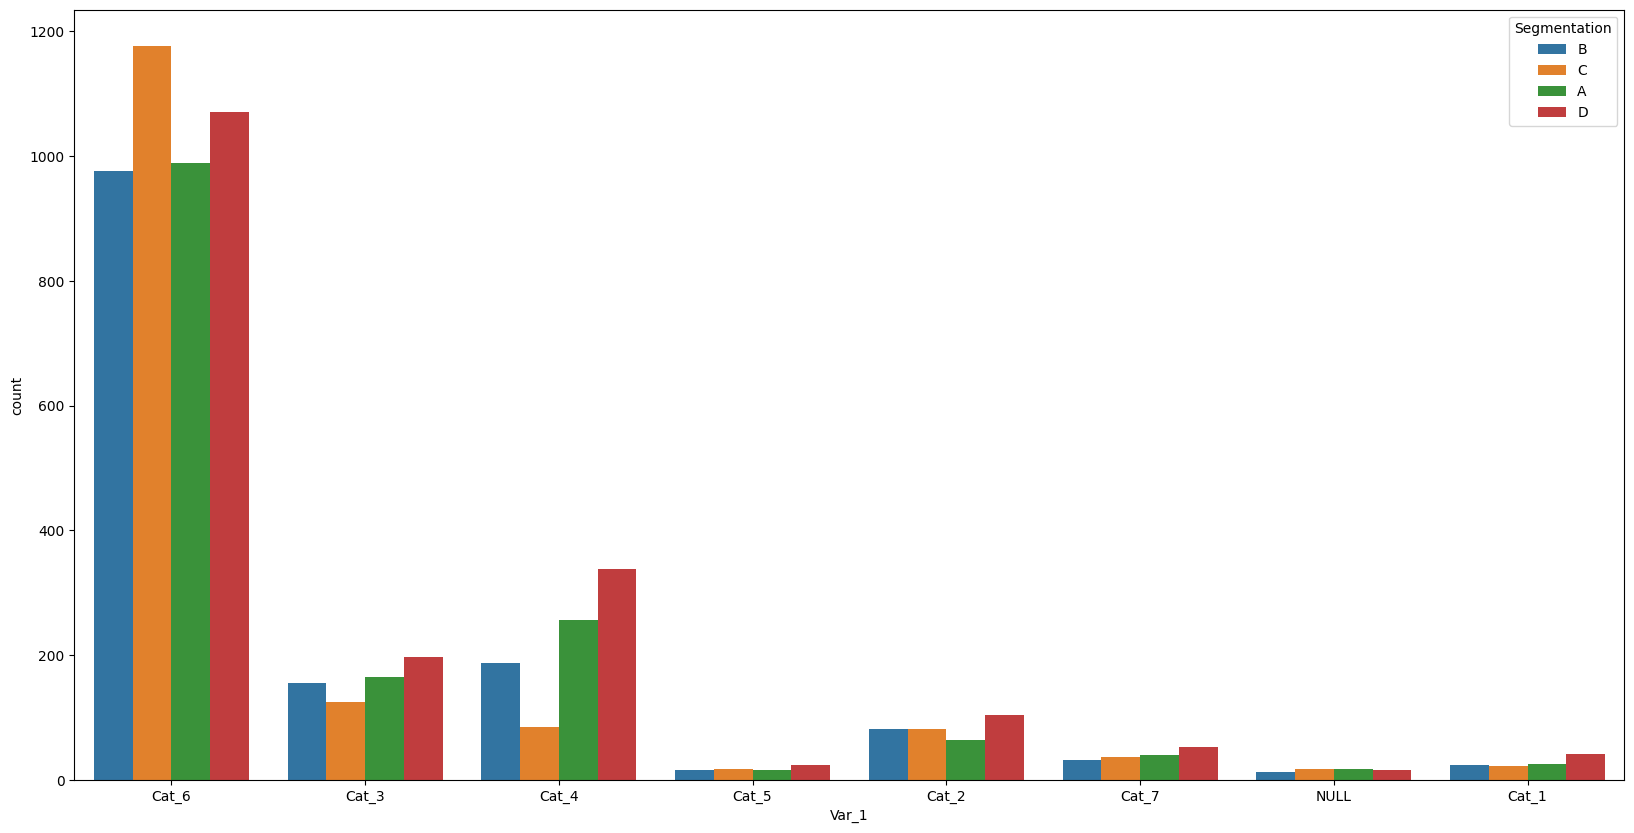

In [21]:
#Var_1
#欠損値を"NULL"という名称のカテゴリーに変換してから集計
df_eda["Var_1"] = df_eda["Var_1"].fillna("NULL")

fig = plt.subplots(figsize=(20,10))
sns.countplot(x="Var_1",hue="Segmentation",data=df_eda)
df_eda.groupby(["Var_1","Segmentation"]).count()["ID"]

# 3.データ探索(EDA)

In [22]:
# 学習データ
display(train.info())
display(train.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6454 non-null   int64  
 1   Gender           6454 non-null   object 
 2   Ever_Married     6338 non-null   object 
 3   Age              6454 non-null   int64  
 4   Graduated        6396 non-null   object 
 5   Profession       6355 non-null   object 
 6   Work_Experience  5781 non-null   float64
 7   Spending_Score   6454 non-null   object 
 8   Family_Size      6190 non-null   float64
 9   Var_1            6392 non-null   object 
 10  Segmentation     6454 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 554.8+ KB


None

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,6454.000000,6454,6338,6454.000000,6396,6355,5781.000000,6454,6190.000000,6392,6454
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,3563,3690,NaN,3960,1980,NaN,3886,NaN,4211,1843
mean,463493.070964,NaN,NaN,43.235203,NaN,NaN,2.604048,NaN,2.862036,NaN,NaN
std,2583.148482,NaN,NaN,16.693985,NaN,NaN,3.362028,NaN,1.529702,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461285.250000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463506.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465735.750000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


In [30]:
df_train = train.copy()
df_test = test.copy()

#IDは削除
df_train = df_train.drop("ID",axis=1)

#Gender maleを1、femaleを0に
df_train["Gender"] = df_train["Gender"].apply(lambda x : 1 if x == "Male" else 0)
df_test["Gender"] = df_test["Gender"].apply(lambda x : 1 if x == "Male" else 0)

#Ever_Married yesかどうか、nullかどうかでそれぞれダミー変数を作成
df_train["Ever_Married_Yes"] = df_train["Ever_Married"].apply(lambda x :1 if x =="Yes" else 0)
df_train["Ever_Married_null"] = df_train["Ever_Married"].apply(lambda x :1 if x != x else 0)
df_train = df_train.drop("Ever_Married",axis=1)

df_test["Ever_Married_Yes"] = df_test["Ever_Married"].apply(lambda x :1 if x =="Yes" else 0)
df_test["Ever_Married_null"] = df_test["Ever_Married"].apply(lambda x :1 if x != x else 0)
df_test = df_test.drop("Ever_Married",axis=1)

#ageの処理なし
#Graduated yesかどうかnullかどうかでそれぞれダミー変数を作成
df_train["Graduated_Yes"] = df_train["Graduated"].apply(lambda x :1 if x =="Yes" else 0)
df_train["Graduated_null"] = df_train["Graduated"].apply(lambda x :1 if x != x else 0)
df_train = df_train.drop("Graduated",axis=1)

df_test["Graduated_Yes"] = df_test["Graduated"].apply(lambda x :1 if x =="Yes" else 0)
df_test["Graduated_null"] = df_test["Graduated"].apply(lambda x :1 if x != x else 0)
df_test = df_test.drop("Graduated",axis=1)

#Profession それぞれの職業でダミー変数化
df_train["Profession_Executive"] = df_train["Profession"].apply(lambda x :1 if x =="Executive" else 0)
df_train["Profession_Artist"] = df_train["Profession"].apply(lambda x :1 if x =="Artist" else 0)
df_train["Profession_Healthcare"] = df_train["Profession"].apply(lambda x :1 if x =="Healthcare" else 0)
df_train["Profession_Lawyer"] = df_train["Profession"].apply(lambda x :1 if x =="Lawyer" else 0)
df_train["Profession_Doctor"] = df_train["Profession"].apply(lambda x :1 if x =="Doctor" else 0)
df_train["Profession_Entertainment"] = df_train["Profession"].apply(lambda x :1 if x =="Entertainment" else 0)
df_train["Profession_Homemaker"] = df_train["Profession"].apply(lambda x :1 if x =="Homemaker" else 0)
df_train["Profession_Marketing"] = df_train["Profession"].apply(lambda x :1 if x =="Marketing" else 0)
df_train["Profession_Engineer"] = df_train["Profession"].apply(lambda x :1 if x =="Engineer" else 0)
df_train = df_train.drop("Profession",axis=1)

df_test["Profession_Executive"] = df_test["Profession"].apply(lambda x :1 if x =="Executive" else 0)
df_test["Profession_Artist"] = df_test["Profession"].apply(lambda x :1 if x =="Artist" else 0)
df_test["Profession_Healthcare"] = df_test["Profession"].apply(lambda x :1 if x =="Healthcare" else 0)
df_test["Profession_Lawyer"] = df_test["Profession"].apply(lambda x :1 if x =="Lawyer" else 0)
df_test["Profession_Doctor"] = df_test["Profession"].apply(lambda x :1 if x =="Doctor" else 0)
df_test["Profession_Entertainment"] = df_test["Profession"].apply(lambda x :1 if x =="Entertainment" else 0)
df_test["Profession_Homemaker"] = df_test["Profession"].apply(lambda x :1 if x =="Homemaker" else 0)
df_test["Profession_Marketing"] = df_test["Profession"].apply(lambda x :1 if x =="Marketing" else 0)
df_test["Profession_Engineer"] = df_test["Profession"].apply(lambda x :1 if x =="Engineer" else 0)
df_test = df_test.drop("Profession",axis=1)

#Work_Experience 欠損値かどうかのダミー変数を特徴量として増加し、欠損値は中央値で埋める
df_train["Work_Experience_null"] = df_train["Work_Experience"].apply(lambda x :1 if x != x else 0)
df_train["Work_Experience"] = df_train["Work_Experience"].fillna(np.nanmedian(df_train["Work_Experience"]))
df_test["Work_Experience_null"] = df_test["Work_Experience"].apply(lambda x :1 if x != x else 0)
df_test["Work_Experience"] = df_test["Work_Experience"].fillna(np.nanmedian(df_train["Work_Experience"]))

#Spending_Score
df_train["Spending_Score_High"] = df_train["Spending_Score"].apply(lambda x :1 if x == "High" else 0)
df_train["Spending_Score_Low"] = df_train["Spending_Score"].apply(lambda x :1 if x == "Low" else 0)
df_train = df_train.drop("Spending_Score",axis=1)
df_test["Spending_Score_High"] = df_test["Spending_Score"].apply(lambda x :1 if x == "High" else 0)
df_test["Spending_Score_Low"] = df_test["Spending_Score"].apply(lambda x :1 if x == "Low" else 0)
df_test = df_test.drop("Spending_Score",axis=1)

#Family_Size 欠損地下道化のダミー変数を特徴料として追加し、欠損値は中央値で埋める
df_train["Family_Size_null"] = df_train["Family_Size"].apply(lambda x :1 if x != x else 0)
df_train["Family_Size"] = df_train["Family_Size"].fillna(np.nanmedian(df_train["Family_Size"]))
df_test["Family_Size_null"] = df_test["Family_Size"].apply(lambda x :1 if x != x else 0)
df_test["Family_Size"] = df_test["Family_Size"].fillna(np.nanmedian(df_train["Family_Size"]))

# Var_1
df_train["Var_1_Cat_1"] = df_train["Var_1"].apply(lambda x :1 if x == "Cat_1" else 0)
df_train["Var_1_Cat_2"] = df_train["Var_1"].apply(lambda x :1 if x == "Cat_2" else 0)
df_train["Var_1_Cat_3"] = df_train["Var_1"].apply(lambda x :1 if x == "Cat_3" else 0)
df_train["Var_1_Cat_4"] = df_train["Var_1"].apply(lambda x :1 if x == "Cat_4" else 0)
df_train["Var_1_Cat_5"] = df_train["Var_1"].apply(lambda x :1 if x == "Cat_5" else 0)
df_train["Var_1_Cat_6"] = df_train["Var_1"].apply(lambda x :1 if x == "Cat_6" else 0)
df_train["Var_1_Cat_7"] = df_train["Var_1"].apply(lambda x :1 if x == "Cat_7" else 0)
df_train = df_train.drop("Var_1",axis=1)
df_test["Var_1_Cat_1"] = df_test["Var_1"].apply(lambda x :1 if x == "Cat_1" else 0)
df_test["Var_1_Cat_2"] = df_test["Var_1"].apply(lambda x :1 if x == "Cat_2" else 0)
df_test["Var_1_Cat_3"] = df_test["Var_1"].apply(lambda x :1 if x == "Cat_3" else 0)
df_test["Var_1_Cat_4"] = df_test["Var_1"].apply(lambda x :1 if x == "Cat_4" else 0)
df_test["Var_1_Cat_5"] = df_test["Var_1"].apply(lambda x :1 if x == "Cat_5" else 0)
df_test["Var_1_Cat_6"] = df_test["Var_1"].apply(lambda x :1 if x == "Cat_6" else 0)
df_test["Var_1_Cat_7"] = df_test["Var_1"].apply(lambda x :1 if x == "Cat_7" else 0)
df_test = df_test.drop("Var_1",axis=1)

#データの確認
display(df_train.info())
display(df_train.describe())
display(df_test.info())
display(df_test.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    6454 non-null   int64  
 1   Age                       6454 non-null   int64  
 2   Work_Experience           6454 non-null   float64
 3   Family_Size               6454 non-null   float64
 4   Segmentation              6454 non-null   object 
 5   Ever_Married_Yes          6454 non-null   int64  
 6   Ever_Married_null         6454 non-null   int64  
 7   Graduated_Yes             6454 non-null   int64  
 8   Graduated_null            6454 non-null   int64  
 9   Profession_Executive      6454 non-null   int64  
 10  Profession_Artist         6454 non-null   int64  
 11  Profession_Healthcare     6454 non-null   int64  
 12  Profession_Lawyer         6454 non-null   int64  
 13  Profession_Doctor         6454 non-null   int64  
 14  Professi

None

,Gender,Age,Work_Experience,Family_Size,Ever_Married_Yes,Ever_Married_null,Graduated_Yes,Graduated_null,Profession_Executive,Profession_Artist,...,Spending_Score_High,Spending_Score_Low,Family_Size_null,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
count,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,...,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000
mean,0.552061,43.235203,2.436783,2.867679,0.571738,0.017973,0.613573,0.008987,0.077471,0.306786,...,0.151999,0.602107,0.040905,0.017509,0.051286,0.099318,0.134180,0.010846,0.652464,0.024791
std,0.497321,16.693985,3.219433,1.498333,0.494865,0.132865,0.486968,0.094378,0.267359,0.461196,...,0.359048,0.489501,0.198085,0.131166,0.220598,0.299112,0.340872,0.103586,0.476225,0.155499
min,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,40.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,53.000000,3.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,89.000000,14.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1614 non-null   int64  
 1   Gender                    1614 non-null   int64  
 2   Age                       1614 non-null   int64  
 3   Work_Experience           1614 non-null   float64
 4   Family_Size               1614 non-null   float64
 5   Ever_Married_Yes          1614 non-null   int64  
 6   Ever_Married_null         1614 non-null   int64  
 7   Graduated_Yes             1614 non-null   int64  
 8   Graduated_null            1614 non-null   int64  
 9   Profession_Executive      1614 non-null   int64  
 10  Profession_Artist         1614 non-null   int64  
 11  Profession_Healthcare     1614 non-null   int64  
 12  Profession_Lawyer         1614 non-null   int64  
 13  Profession_Doctor         1614 non-null   int64  
 14  Professi

None

,ID,Gender,Age,Work_Experience,Family_Size,Ever_Married_Yes,Ever_Married_null,Graduated_Yes,Graduated_null,Profession_Executive,...,Spending_Score_High,Spending_Score_Low,Family_Size_null,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.00000,1614.000000,1614.000000,1614.000000,...,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,463423.806072,0.529120,44.393432,2.617720,2.811029,0.590458,0.01487,0.624535,0.012392,0.061338,...,0.145601,0.614622,0.043990,0.012392,0.056382,0.112144,0.138166,0.009294,0.636307,0.026642
std,2643.817216,0.499306,16.755511,3.439598,1.504151,0.491902,0.12107,0.484393,0.110660,0.240024,...,0.352815,0.486835,0.205137,0.110660,0.230729,0.315641,0.345181,0.095984,0.481211,0.161084
min,458988.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,461095.750000,0.000000,31.250000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,463306.500000,1.000000,41.000000,1.000000,3.000000,1.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,465760.500000,1.000000,55.000000,4.000000,4.000000,1.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,467956.000000,1.000000,89.000000,14.000000,9.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

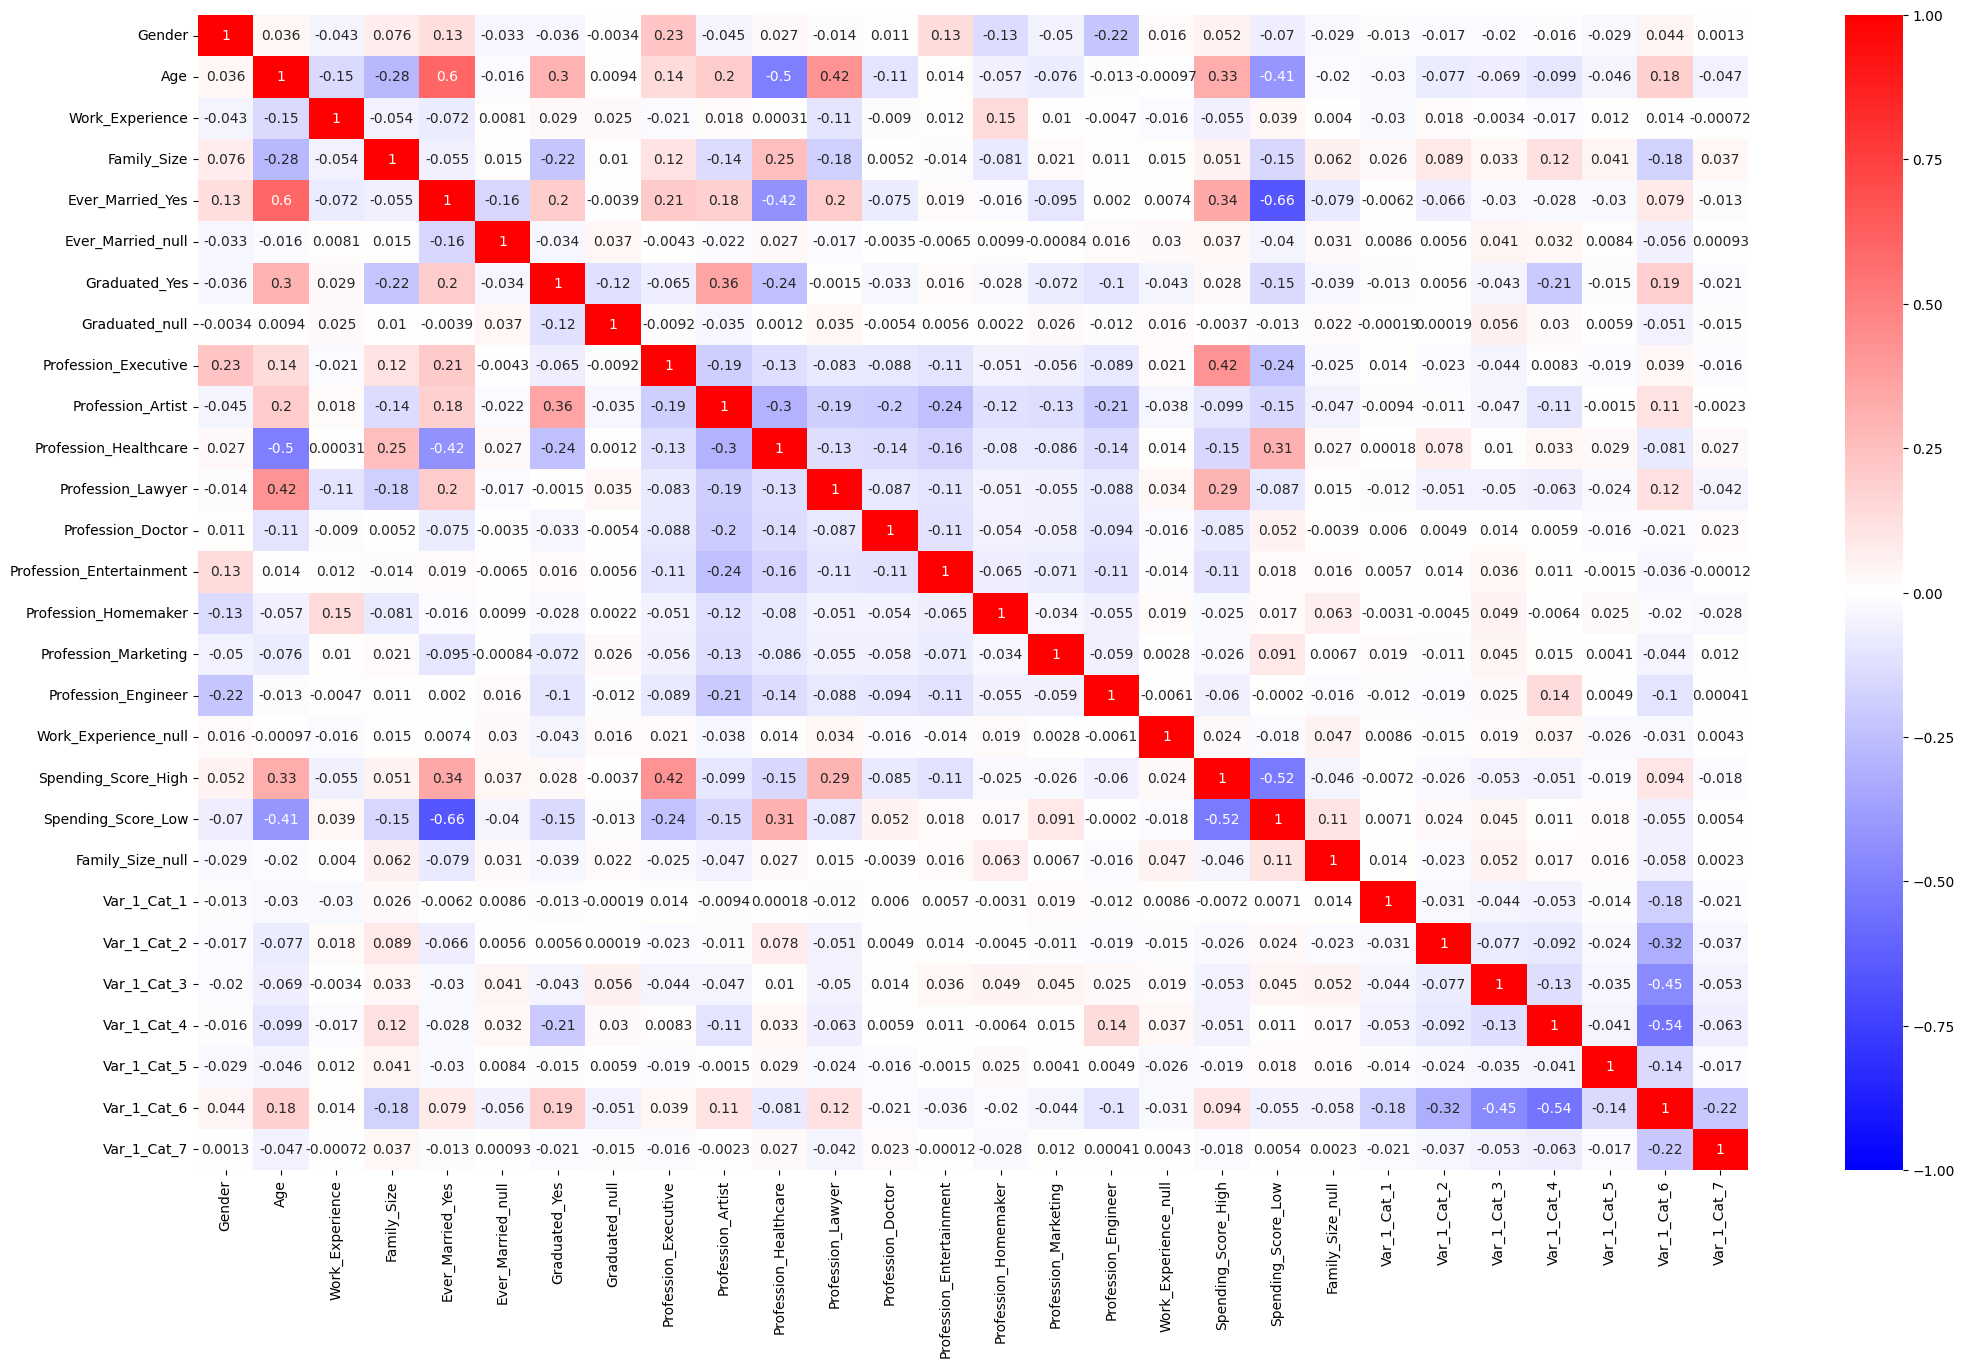

In [33]:
fig = plt.subplots(figsize=(25,15))
#sns.heatmap(df_train.corr(method="spearman"), cmap="bwr", annot=True, vmax=1, vmin=-1, center=0)

#数値データだけで相関
numeric_df = df_train.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(method="spearman"), cmap="bwr", annot=True, vmax=1, vmin=-1, center=0)


In [34]:
#説明変数と目的変数に分割
X = df_train.drop("Segmentation",axis=1)
y_A = df_train["Segmentation"].apply(lambda x:1 if x == "A" else 0)
y_multi = df_train["Segmentation"]

# 4.予測と評価

In [35]:
#ロジスティック回帰(sklearn)
#2値分類の場合
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_A,test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l1", solver="liblinear", C=0.1) #C値で正則化の強さを調整(低いほど強い)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

#スコア算出
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, log_loss
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))
print("auc = ", roc_auc_score(y_true=y_test,y_score=y_pred_proba))
print("log_loss = ", log_loss(y_true=y_test, y_pred=y_pred_proba))
pd.DataFrame(lr.coef_, columns=X.columns) 

confusion matrix = 
 [[962  16]
 [298  15]]
accuracy =  0.7567776917118513
f1 score =  0.0872093023255814
auc =  0.6764538701268156
log_loss =  0.5176987370901964


,Gender,Age,Work_Experience,Family_Size,Ever_Married_Yes,Ever_Married_null,Graduated_Yes,Graduated_null,Profession_Executive,Profession_Artist,...,Spending_Score_High,Spending_Score_Low,Family_Size_null,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0.0,-0.007233,0.013804,-0.226923,0.0,0.0,-0.078631,0.0,0.0,-0.130537,...,0.183624,0.528581,0.0,0.0,0.0,0.0,0.238289,0.0,-0.213182,0.0


In [36]:
#2クラス予測版ベースラインモデル すべて0(Aではない)として予測
y_pred = [0] * len(y_test)
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
#ベースラインモデルより劣っているため、良くない
#決定木など他のモデルを検討する余地あり

accuracy =  0.7575522850503486


In [37]:
#決定木分析
#2値分類の場合
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_A, test_size=0.2, random_state=1)

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4) #max_depthを指定
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

#スコア算出
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, log_loss
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))
print("auc = ", roc_auc_score(y_true=y_test,y_score=y_pred_proba))
print("log_loss=", log_loss(y_test, y_pred_proba))
#決定木ならベースラインをわずかに上回る

confusion matrix = 
 [[942  36]
 [269  44]]
accuracy =  0.7637490317583269
f1 score =  0.22391857506361323
auc =  0.6918239610079906
log_loss= 0.4979556952133608


In [38]:
#ロジスティック回帰(sklearn)
#多クラス分類の場合
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_multi,test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="sag", C=0.1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#スコア算出
from sklearn.metrics import confusion_matrix, accuracy_score
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

confusion matrix = 
 [[144  48  58  63]
 [ 92  60  92  33]
 [ 44  42 171  44]
 [ 98  10  12 280]]
accuracy =  0.5073586367157242


/Users/sekiguchiyuma/Library/CloudStorage/GoogleDrive-yuuuuuma1101@gmail.com/マイドライブ/タスク/IT/pythonファイナンス分析(キノクエスト)/1.株価のデータを可視化してみよう01/1.dataset/kadai/kino_env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [39]:
#多クラス版ベースラインモデル 全てDとして予測
y_pred = ["D"] * len(y_test)
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

#多クラス予測であれば機械学習モデルの方が優秀

accuracy =  0.30983733539891556


confusion matrix = 
 [[150  57  41  65]
 [ 79  85  84  29]
 [ 43  57 157  44]
 [ 94  17   6 283]]
accuracy =  0.52285050348567


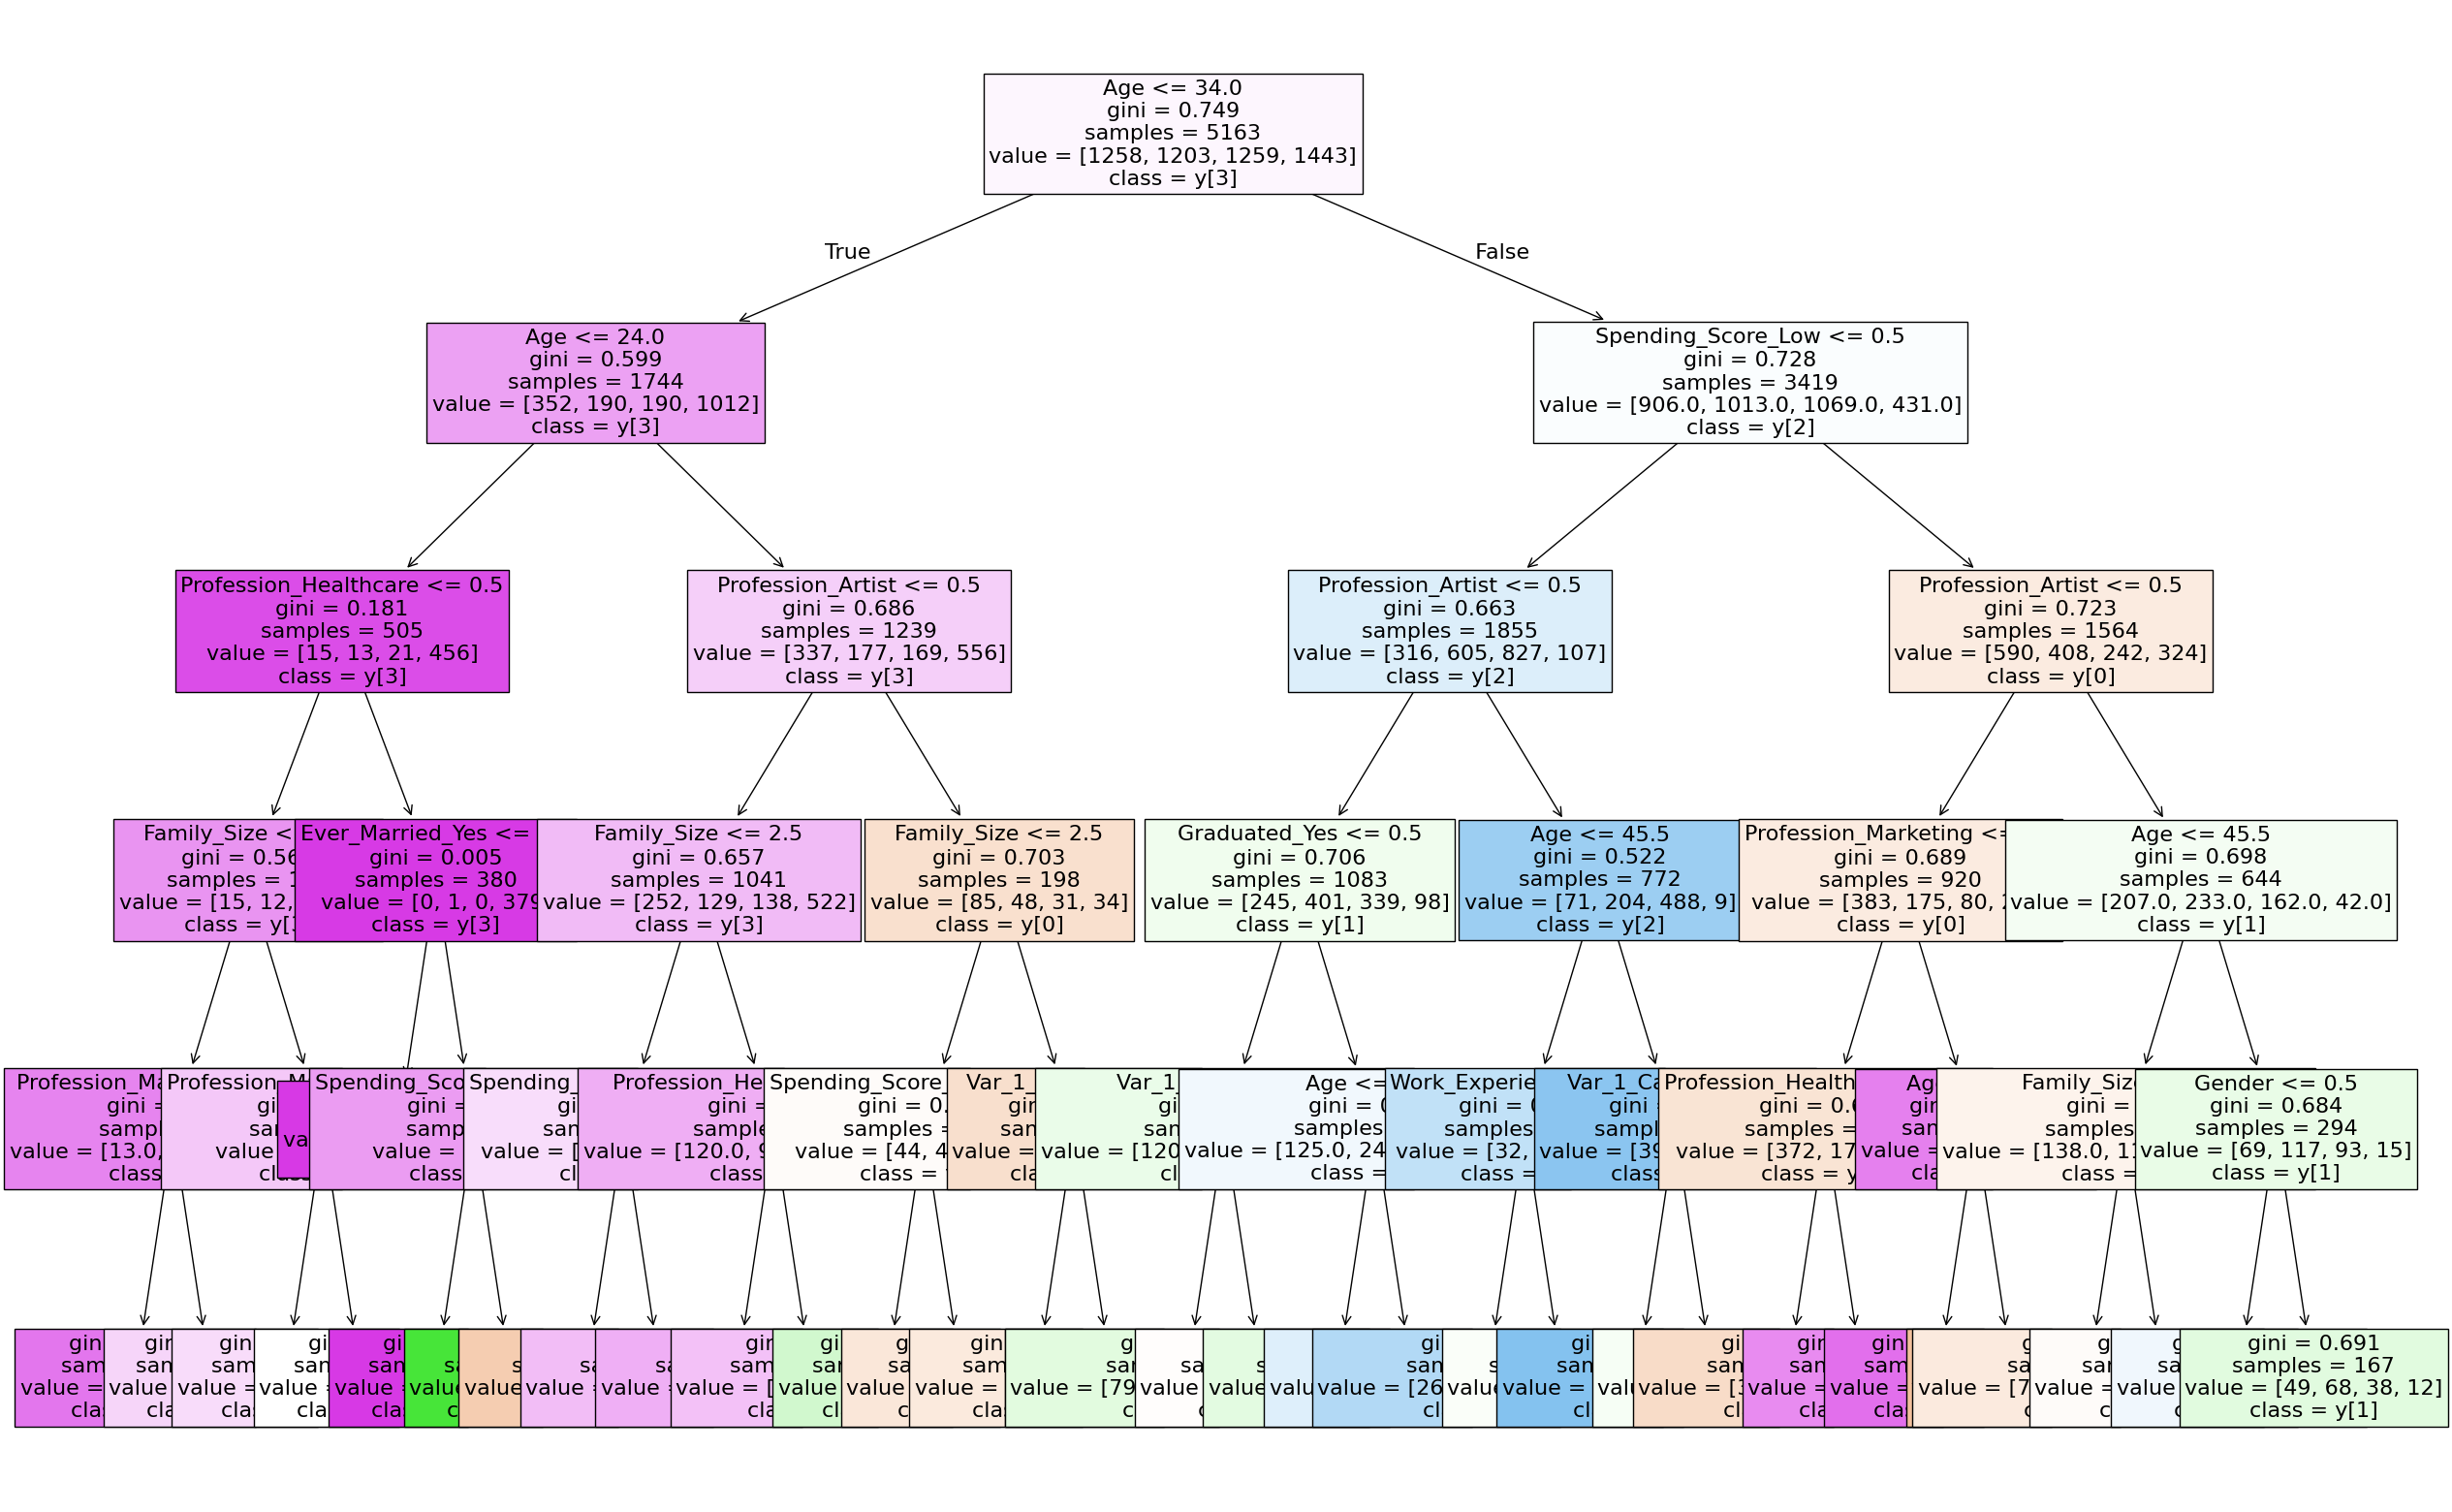

In [40]:
#決定木分析
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=1)

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5) #max_depthを指定
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#スコア算出
from sklearn.metrics import confusion_matrix, accuracy_score
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

#可視化
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(clf, feature_names=X_train.columns, class_names=True, filled=True, fontsize=16);

#回帰分析よりも良い結果であるため、決定木モデルを採用

In [44]:
#作成したモデルでsubmitデータを予測
X_test = df_test.drop("ID", axis=1)
pred = clf.predict(X_test)
df_test["y"] = pred
test_data = df_test[["ID", "y"]].set_index("ID")
test_data.to_csv("submit.csv", index=True)
test_data
#最終スコア0.515

,y
ID,
461642,A
462489,B
459573,A
461424,A
460283,A
...,...
465156,C
459836,D
462705,B
